In [1]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
parentdir = os.path.abspath("..")
os.sys.path.insert(0,parentdir) 
import cg_functions as cg_fn
from astropy.table import Table
import galsim 

plt.rc('font', family='serif', size=14)
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=14)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=15)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)


# Reference Galaxy

In [2]:
# Plots to be saved at
plot_path = parentdir + '/plots/'

disk SED m_cg, mean, std
Im -1.1420815560687052e-06 4.673742187534494e-05
Im 1.555230035890669e-06 0.0005234917152188234
Sbc -3.010727379070357e-06 -0.00011683158944412976
Sbc 2.4379376508365433e-06 0.0007354510006747881
Scd -1.0342928694957841e-06 -0.00011616706902467595
Scd 1.543486157749482e-06 0.0005033137553239787


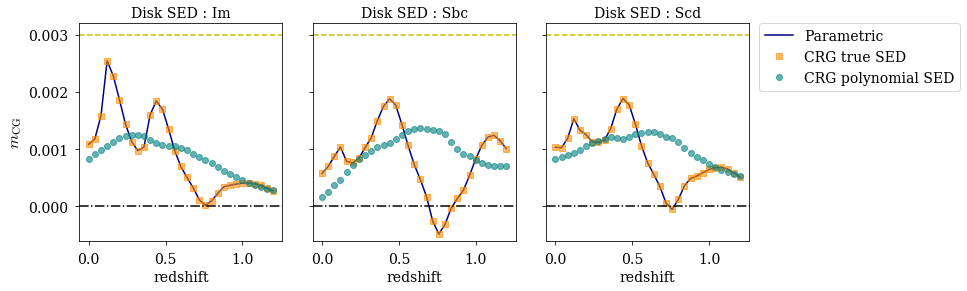

In [3]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat = {}
for dSED in dSEDs :
    path = parentdir + '/results/'
    name = path + 'ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat[dSED] = Table.read(name,format='fits')

#plt.figure(1,figsize=[12,4])
#plt.subplots_adjust(wspace = 0.3)
#plt.subplots_adjust(hspace = 0.3)

fig, ax = plt.subplots(1, len(dSED), sharey=True, figsize=[12,4])
fig.subplots_adjust(wspace = 0.15)
fig.subplots_adjust(hspace = 0.15)
#ax=[[]]*3
print("disk SED m_cg, mean, std")
for i,dSED in enumerate(dSEDs) :
    print(dSED, np.mean(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_tru_m1'].T[2]), np.mean(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_m1'].T[2]))
    print(dSED, np.std(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_tru_m1'].T[2]), np.std(cat[dSED]['para_m1'].T[2]-cat[dSED]['CRG_m1'].T[2]))

    redshifts = cat[dSED]['redshift']
    ax[i].plot(redshifts, cat[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    ax[i].plot(redshifts, cat[dSED]['CRG_tru_m1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    ax[i].plot(redshifts, cat[dSED]['CRG_m1'].T[2],
             'o',label='CRG polynomial SED',color='teal', alpha=0.6)
    ax[i].axhline(0, linestyle= '-.', c='k')
    ax[i].axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    ax[i].set_xlabel('redshift', size=14)
    
    ax[i].set_title("Disk SED : %s"%dSED, size=14)
    ax[i].set_ylim([-0.0006, 0.0032])
ax[0].set_ylabel(r'$m_{\rm CG}$', size=16)
ax[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "ref_gal_cg_CRG.png", 
             bbox_inches='tight')



In [4]:
snr, m, m_std, m_err = np.loadtxt(parentdir + '/results/model_cg_err_z_0.4.txt').T
in_snr = np.loadtxt(parentdir + '/results/model_cg_err_z_0.4_i_band_snrs.txt')

In [5]:
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
np.interp(0.3,xp,fp)

0.001244251683184434

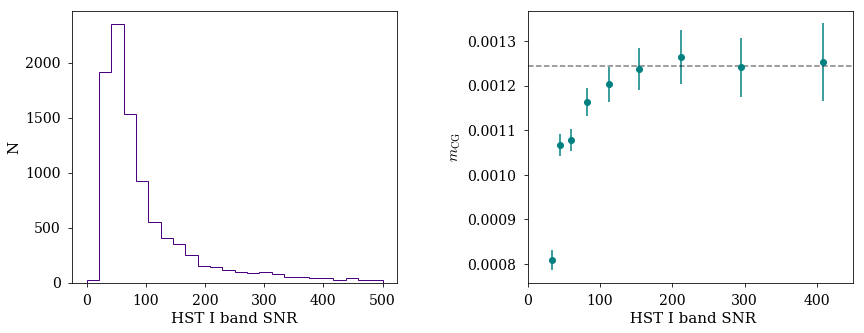

In [6]:
plt.figure(1,figsize=[14,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,2,2)
xp = cat['Im']['redshift']
fp = cat['Im']['CRG_m1'].T[2]
val = np.interp(0.3, xp, fp)
plt.axhline(val, linestyle= '--', c='k', alpha=0.5)
plt.errorbar(snr, m,yerr=m_err,color='teal',
                marker='o', linestyle='')
plt.xlabel(' HST I band SNR')
plt.ylabel(r'$m_{\rm CG}$')
plt.xlim([0,450])
# plt.title('cg bias of CRG from reference galaxy binned in SNR')
plt.subplot(2,2,1)
plt.ylabel('N')
plt.hist(in_snr,np.linspace(0,500,25),
         color='indigo',histtype='step',rwidth=0.7)
plt.xlabel('HST I band SNR')
# plt.title('Histogram of SNR in I band')
plt.savefig(plot_path + "ref_gal_cg_snr.png", 
             bbox_inches='tight')

# Catsim

In [7]:
def get_plt_rng(arr):
    """Get 5th and 95th percentile"""
    return np.percentile(arr,5), np.percentile(arr,95)

In [8]:
cg_bias_cat = Table.read(parentdir + '/results/final_catsim_cg_bias_only.fits', format='fits')

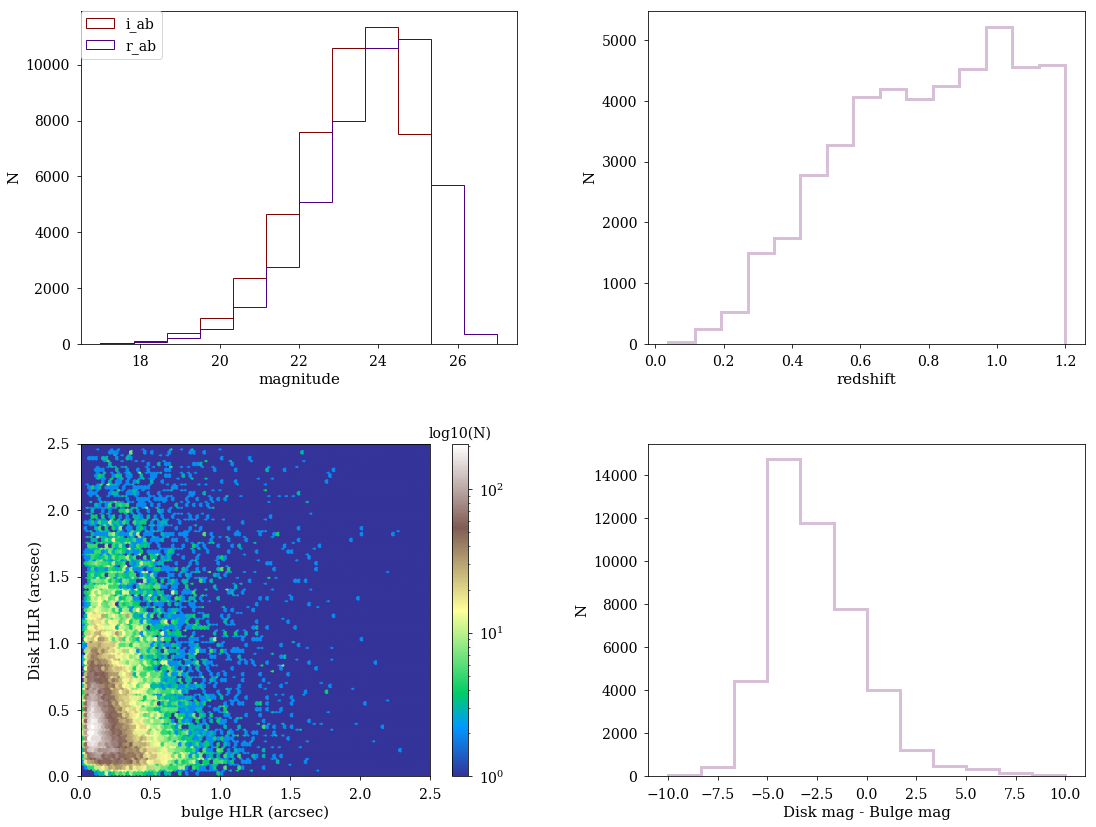

In [9]:
## Plot Catsim galaxy properties 
plt.figure(1,figsize=[18,30])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(4,2,1)
plt.ylabel("N")
plt.hist(cg_bias_cat['i_ab'],np.linspace(17, 27,13),
         alpha=0.99,rwidth=0.9, histtype='step',
         color='maroon', label='i_ab')
plt.hist(cg_bias_cat['r_ab'],np.linspace(17, 27,13),
         alpha=0.99,rwidth=0.9, histtype='step',
         color='indigo', label='r_ab')
plt.xlabel('magnitude')
plt.legend(loc=2)
#plt.title('Histogram of magnitudes', size=16)

plt.subplot(4,2,3)
x = cg_bias_cat['BulgeHalfLightRadius']
y = cg_bias_cat['DiskHalfLightRadius']
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(0,2.5,0,2.5), cmap='terrain')
plt.xlim([0,2.5])
plt.ylim([0,2.5])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('bulge HLR (arcsec)')
plt.ylabel('Disk HLR (arcsec)')
#plt.title('Disk HLR vs Bulge HLR', size=16)

plt.subplot(4,2,2)
plt.ylabel("N")
plt.hist(cg_bias_cat['redshift_1'], 15,
         alpha=1,rwidth=0.9, histtype='step',
         color='thistle', linewidth=3)
plt.xlabel('redshift')
#plt.title('Histogram of redshifts', size=16)

plt.subplot(4,2,4)
plt.ylabel("N")
plt.hist(cg_bias_cat['magnorm_disk']-cg_bias_cat['magnorm_bulge'], np.linspace(-10,10,13),
         alpha=1,rwidth=0.9, histtype='step',
         color='thistle', linewidth=3)
#plt.title('Histogram of Disk-bulge magnitude', size=16)
plt.xlabel('Disk mag - Bulge mag')
plt.savefig(plot_path + "cat_gal_rearranged.png", 
             bbox_inches='tight')

# Results of cg analysis on catsim galaxies

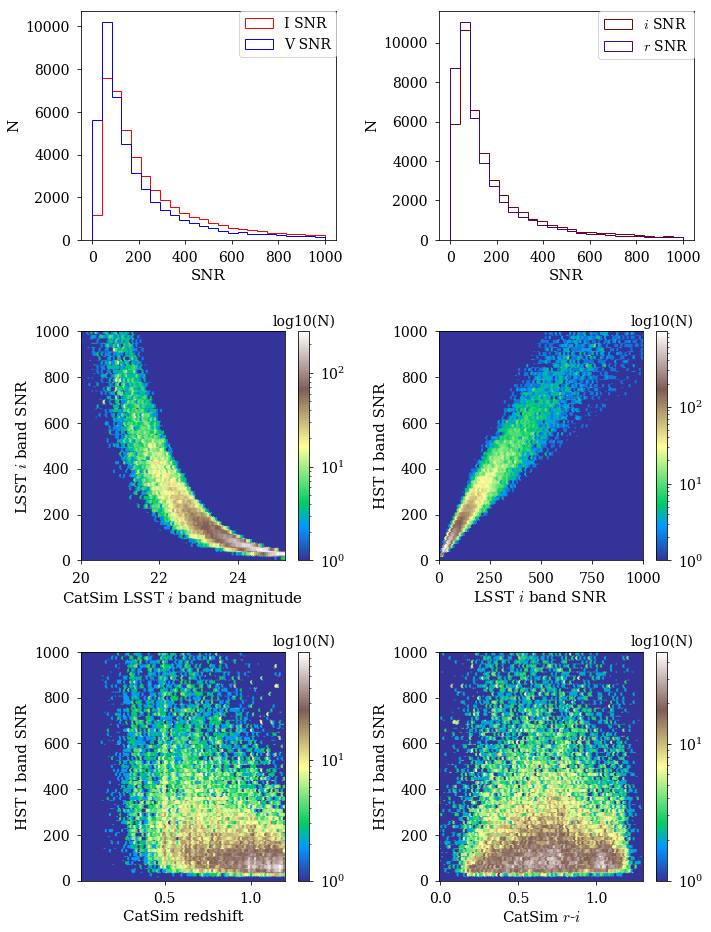

In [10]:
## Plot Catsim galaxy properties 
sn_max=1000
plt.figure(1,figsize=[11, 16])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(3,2,1)
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.99,
         color='r',rwidth=0.9, label='I SNR', histtype='step')
plt.hist(cg_bias_cat['HST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.99,
         color='b',rwidth=0.9, label='V SNR', histtype='step')
plt.xlabel('SNR')
plt.ylabel('N')
plt.legend(loc=1)
# plt.title('Histogram of HST SNRs', size=16)

plt.subplot(3,2,2)
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[1],np.linspace(0,sn_max,25), alpha=0.99,
         color='maroon',rwidth=0.9, label=r'$i$ SNR', histtype='step')
plt.hist(cg_bias_cat['LSST_sn_ellip_gauss'].T[0],np.linspace(0,sn_max,25), alpha=0.99,
         color='indigo',rwidth=0.9, label=r'$r$ SNR', histtype='step')
plt.xlabel('SNR')
plt.ylabel('N')
plt.legend(loc=0)
# plt.title('Histogram of LSST SNRs', size=16)

plt.subplot(3,2,3)
x = cg_bias_cat['i_ab']
y = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(int(xmin),25.2,0,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlim([20,25.2])
plt.ylim([0, 1000])
plt.xlabel(r'CatSim LSST $i$ band magnitude')
plt.ylabel(r'LSST $i$ band SNR')
# plt.title('LSST i mag vs SNR', size=16)

plt.subplot(3,2,4)
x = cg_bias_cat['LSST_sn_ellip_gauss'].T[1]
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log', extent=(0,1000, 0, 1000),
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel(r'LSST $i$ band SNR')
plt.ylabel('HST I band SNR')

plt.subplot(3,2,5)
x = cg_bias_cat['redshift_1']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(0.01,1.2, 0, 1000) ,bins='log',
            cmap='terrain')
clb = plt.colorbar()
plt.xlim([0.01, 1.2])
plt.ylim([0, 1000])
clb.ax.set_title('log10(N)', size=14)
plt.xlabel('CatSim redshift')
plt.ylabel('HST I band SNR')

plt.subplot(3, 2, 6)
x =  cg_bias_cat['r_ab']- cg_bias_cat['i_ab']
y = cg_bias_cat['HST_sn_ellip_gauss'].T[1]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y, extent=(-0.01,1.3, 0, 1000) ,bins='log',
            cmap='terrain')
plt.ylim([0, 1000])
plt.xlim([-.01,1.3])
clb = plt.colorbar()
clb.ax.set_title('log10(N)', size=14)
plt.xlabel(r'CatSim $r$-$i$')
plt.ylabel('HST I band SNR')

plt.savefig(plot_path + "cat_gal_snr.png", 
             bbox_inches='tight')

m_parametric = 2.686182015591733e-05 +- 2.7681437352933476e-06
m_CRG = -0.0016600289847274804 +- 0.0005005765664089677
m_parametric = 6.165112480756784e-05 +- 2.7681437352933476e-06
m_CRG = -4.096371207954469e-06 +- 0.0005005765664089677


/Users/sowmyak/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


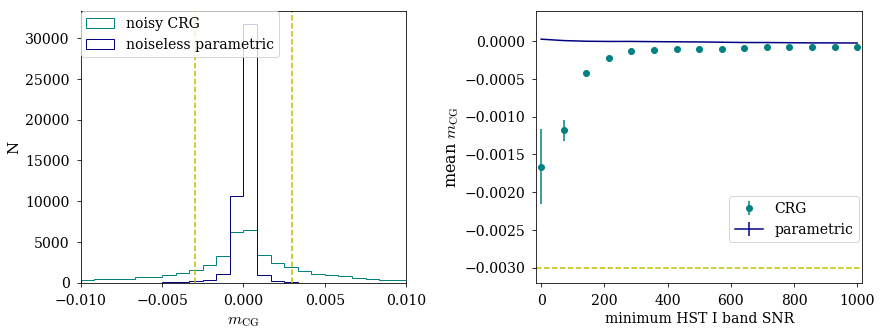

In [11]:
plt.figure(1,figsize=[14,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,2,1)
plt.hist(cg_bias_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25),
         alpha=0.99, rwidth=0.9,
         color='teal', label='noisy CRG', histtype='step')
plt.hist(cg_bias_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25),
         alpha=0.99, rwidth=0.9,
         color='navy', label='noiseless parametric', histtype='step')

plt.locator_params(axis ='x', tight=True, nbins=7)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$', size=16)
plt.ylabel("N")
plt.legend(loc=2)
# plt.title('Histogram of m_cg', size=16)

plt.subplot(2,2,2)
snrs = np.linspace(0, 1000,15)
mean_m_para, mean_m_CRG = [],[]
mean_m_para_err, mean_m_CRG_err = [],[]
for s in snrs:
    q,= np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>s)
    p = cg_bias_cat['m_para1'][q].T[2]
    c = cg_bias_cat['m_CRG1'][q].T[2]
    mean_m_para.append(np.mean(p))
    mean_m_CRG.append(np.mean(c))
    mean_m_para_err.append(np.std(p)/len(q)**0.5)
    mean_m_CRG_err.append(np.std(c)/len(q)**0.5)
plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err,
             c='teal', marker='o', linestyle='', label='CRG')
plt.errorbar(snrs, mean_m_para, yerr=mean_m_para_err,
             c='navy', label='parametric')

plt.xlim([-15, 1015])
plt.ylim([-0.0032, 0.0004])
plt.axhline(-0.003, linestyle='--', c='y')
plt.xlabel('minimum HST I band SNR', size=14)
plt.ylabel(r'mean $m_{\rm CG}$', size=16)
plt.legend(bbox_to_anchor=(.99,0.15), loc=4)
#plt.legend(loc=4)
plt.savefig(plot_path + "cat_mcg_results.png", 
             bbox_inches='tight')
mean = np.mean(cg_bias_cat['m_para1'].T[2])
err = np.std(cg_bias_cat['m_para1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print("m_parametric = {0} +- {1}".format(mean, err))
mean = np.mean(cg_bias_cat['m_CRG1'].T[2])
err = np.std(cg_bias_cat['m_CRG1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print("m_CRG = {0} +- {1}".format(mean, err))

median = np.median(cg_bias_cat['m_para1'].T[2])
err = np.std(cg_bias_cat['m_para1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print("m_parametric = {0} +- {1}".format(median, err))
median = np.median(cg_bias_cat['m_CRG1'].T[2])
err = np.std(cg_bias_cat['m_CRG1'].T[2])/len(cg_bias_cat['m_para1'])**0.5
print("m_CRG = {0} +- {1}".format(median, err))

Results for galaxy with SNR >100


<Figure size 1152x1008 with 0 Axes>

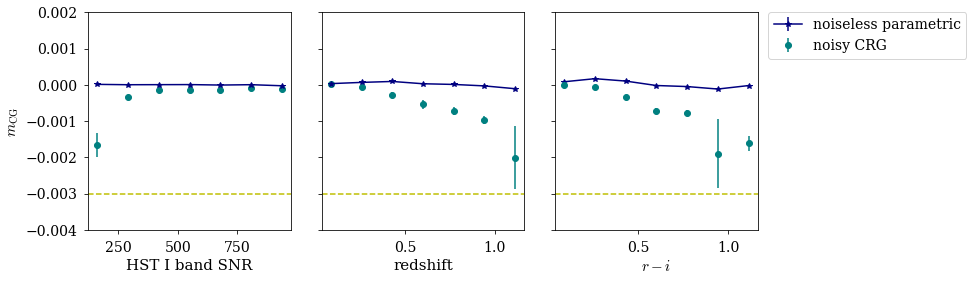

In [12]:
print("Results for galaxy with SNR >100")
plt.figure(1,figsize=[16,14])

i=2
fig, ax = plt.subplots(1, 3, sharey=True, figsize=[12,4])
fig.subplots_adjust(wspace = 0.15)
fig.subplots_adjust(hspace = 0.15)


in_bins = np.linspace(100, 1000,8)
d = np.digitize(cg_bias_cat['HST_sn_ellip_gauss'].T[1], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'].T[i][d == j]) for j in range(1, len(in_bins))])
ax[0].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'].T[i][d == j]) for j in range(1, len(in_bins))])
ax[0].errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
ax[0].set_ylim([-0.004,0.002])
ax[0].axhline(-0.003, linestyle='--', c='y')
ax[0].locator_params(axis='y',tight=True, nbins=6)
ax[0].set_xlabel('HST I band SNR')
ax[0].set_ylabel(r'$m_{\rm CG}$')
#ax[0].set_title('CG shear bias binned in I band SNR', size=16)

q, = np.where(cg_bias_cat['HST_sn_ellip_gauss'].T[1]>100)

in_bins = np.linspace(0, 1.2,8)
d = np.digitize(cg_bias_cat['redshift_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[1].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='')
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[1].errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-')
ax[1].set_ylim([-0.004,0.002])
ax[1].axhline(-0.003, linestyle='--', c='y')
ax[1].locator_params(axis='y',tight=True, nbins=6)
ax[1].set_xlabel('redshift')
#ax[1].set_ylabel(r'$m_{\rm CG}$', size=16)
#ax[1].set_title('CG shear bias binned in redshift', size=16)


in_bins = np.linspace(0, 1.2,8)
x_in = cg_bias_cat['r_ab'][q]- cg_bias_cat['i_ab'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [cg_bias_cat['m_para1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_para1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_para1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[2].errorbar(x[:-1],y,yerr=ystd/num**0.5, c='navy',
             marker='*', linestyle='-', label='noiseless parametric')
y = [cg_bias_cat['m_CRG1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([cg_bias_cat['m_CRG1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(cg_bias_cat['m_CRG1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
ax[2].errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='', label='noisy CRG')

plt.ylim([-0.004,0.002])
ax[2].axhline(-0.003, linestyle='--', c='y')
ax[2].locator_params(axis='y',tight=True, nbins=6)
ax[2].set_xlabel(r'$r-i$')
#ax[2].set_ylabel(r'$m_{\rm CG}$', size=16)
#ax[2].set_title('CG shear bias binned in color' , size=16)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plot_path + "cat_mcg_bin.png", 
             bbox_inches='tight')

## I band with noise

In [13]:
comb_cat = Table.read(parentdir + '/results/catsim_cg_bias_multi_band.fits', format='fits')
print("i band: ", np.mean(comb_cat['m_para1_i'].T[2]), np.std(comb_cat['m_para1_i'].T[2])/float(len(comb_cat['m_para1_i'].T[2])))
print("r band: ", np.mean(comb_cat['m_para1'].T[2]), np.std(comb_cat['m_para1'].T[2])/float(len(comb_cat['m_para1'].T[2])))

i band:  3.722968710583037e-05 4.612075682024168e-09
r band:  2.6822272733833576e-05 1.3167443801490171e-08


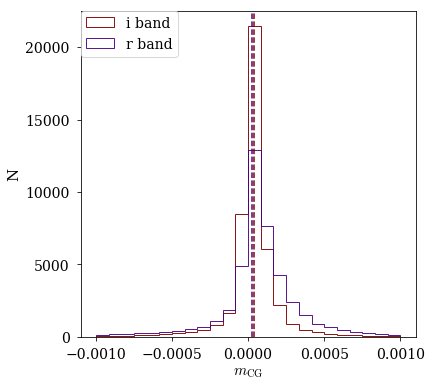

In [14]:
plt.figure(figsize=(6,6))
plt.hist(comb_cat['m_para1_i'].T[2],np.linspace(-0.001,0.001,25),
         alpha=0.9,histtype='step',
         color='maroon', label='i band')
plt.hist(comb_cat['m_para1'].T[2],np.linspace(-0.001,0.001,25),
         alpha=0.9,histtype='step',
         color='indigo', label='r band')
plt.axvline(np.mean(comb_cat['m_para1'].T[2]), linestyle='--', color='indigo')
plt.axvline(np.mean(comb_cat['m_para1_i'].T[2]), linestyle='--', color='maroon')
plt.xlabel(r'$m_{\rm CG}$')
plt.legend(loc=2)
plt.ylabel("N")
plt.locator_params(axis='x', nbins=5)
plt.savefig(plot_path + "cat_para_i_r.png", 
             bbox_inches='tight')

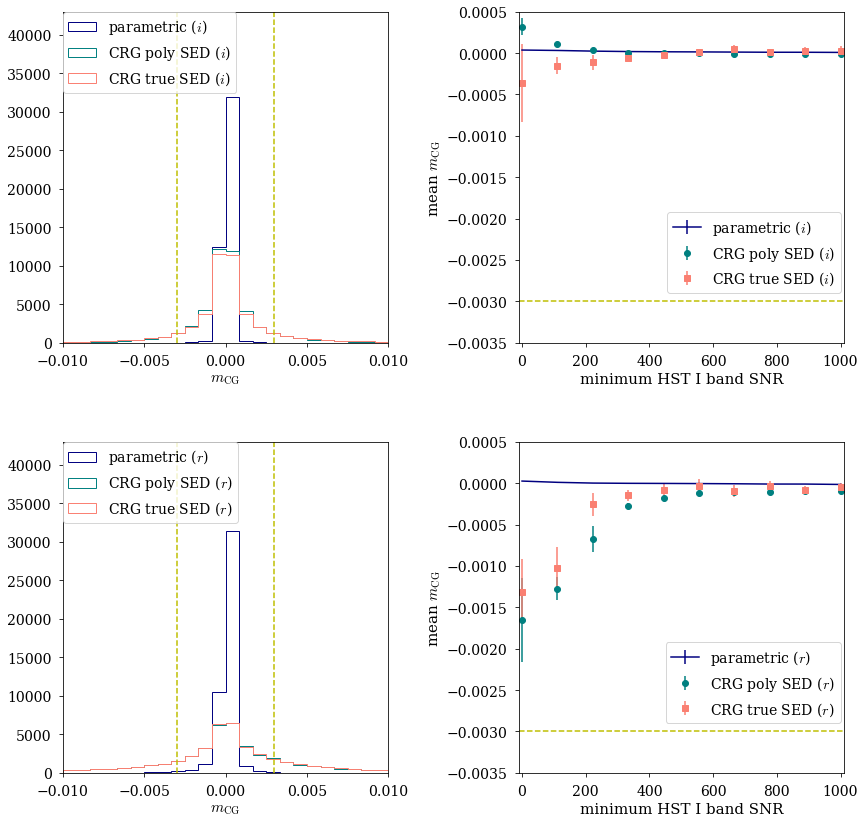

In [15]:
snrs = np.linspace(0, 1000,10)
plt.figure(1,figsize=[14,14])
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace = 0.4)
plt.subplot(2,2,1)

plt.hist(comb_cat['m_para1_i'].T[2], np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='navy', label=r'parametric ($i$)')
plt.hist(comb_cat['m_CRG1_i'].T[2],np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='teal', label=r'CRG poly SED ($i$)')
plt.hist(comb_cat['m_CRG_tru1_i'].T[2],np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='salmon', label=r'CRG true SED ($i$)')

plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$')
#plt.title('Histogram of m_cg in i band')
plt.locator_params(tight=True, nbins=6, axis='x')
# plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.legend(loc=2)
plt.ylim([0, 43000])

#plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.subplot(2,2,2)
mean_m_para_i, mean_m_CRG1_i, mean_m_CRG2_i = [],[],[]
mean_m_para_err_i, mean_m_CRG1_err_i, mean_m_CRG2_err_i = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1_i'][q].T[2]
    c1 = comb_cat['m_CRG1_i'][q].T[2]
    c2 = comb_cat['m_CRG_tru1_i'][q].T[2]
    mean_m_para_i.append(np.mean(p))
    mean_m_CRG1_i.append(np.mean(c1))
    mean_m_CRG2_i.append(np.mean(c2))
    mean_m_para_err_i.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_i.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_i.append(np.std(c2)/len(q)**0.5)
    
plt.errorbar(snrs, mean_m_para_i, yerr=mean_m_para_err_i, label=r'parametric ($i$)', c='navy')
plt.errorbar(snrs, mean_m_CRG1_i, yerr=mean_m_CRG1_err_i, marker='o',linestyle='',
             c='teal', label=r'CRG poly SED ($i$)')
plt.errorbar(snrs, mean_m_CRG2_i, yerr=mean_m_CRG2_err_i, marker='s',linestyle='',
             c='salmon', label=r'CRG true SED ($i$)')

plt.xlabel('minimum HST I band SNR')
plt.ylabel(r'mean $m_{\rm CG}$')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
#plt.title('m_cg in i band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.legend(bbox_to_anchor=(.99,0.15), loc=4)
plt.xlim([-11, 1011])
plt.ylim([-0.0035, 0.0005])


plt.subplot(2,2,3)

plt.hist(comb_cat['m_para1'].T[2], np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='navy', label=r'parametric ($r$)')
plt.hist(comb_cat['m_CRG1'].T[2],np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='teal', label=r'CRG poly SED ($r$)')

plt.hist(comb_cat['m_CRG2'].T[2],np.linspace(-0.01,0.01,25),histtype='step', alpha=0.99,
         color='salmon', label=r'CRG true SED ($r$)')

plt.xlim([-0.01,0.01])
plt.xlabel(r'$m_{\rm CG}$')
#plt.title('Histogram of m_cg in r band')
plt.locator_params(tight=True, nbins=6, axis='x')
plt.axvline(0.003, linestyle='--', c='y')
plt.axvline(-0.003, linestyle='--', c='y')
plt.legend(loc=2)
plt.ylim([0, 43000])
#plt.legend(bbox_to_anchor=(1.05,1), loc=2)

plt.subplot(2,2,4)
mean_m_para_r, mean_m_CRG1_r, mean_m_CRG2_r = [],[],[]
mean_m_para_err_r, mean_m_CRG1_err_r, mean_m_CRG2_err_r = [],[],[]
for s in snrs:
    q,= np.where(comb_cat['HST_sn_ellip_gauss_2'].T[1]>s)
    p = comb_cat['m_para1'][q].T[2]
    c1 = comb_cat['m_CRG1'][q].T[2]
    c2 = comb_cat['m_CRG_tru1'][q].T[2]
    mean_m_para_r.append(np.mean(p))
    mean_m_CRG1_r.append(np.mean(c1))
    mean_m_CRG2_r.append(np.mean(c2))
    mean_m_para_err_r.append(np.std(p)/len(q)**0.5)
    mean_m_CRG1_err_r.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG2_err_r.append(np.std(c2)/len(q)**0.5)
    
plt.errorbar(snrs, mean_m_para_r, yerr=mean_m_para_err_r, label=r'parametric ($r$)',c='navy')
plt.errorbar(snrs, mean_m_CRG1_r, yerr=mean_m_CRG1_err_r, c='teal',marker='o',
             linestyle='', label=r'CRG poly SED ($r$)')
plt.errorbar(snrs, mean_m_CRG2_r, yerr=mean_m_CRG2_err_r, c='salmon',marker='s',
             linestyle='' ,label=r'CRG true SED ($r$)')
plt.xlim([-11, 1011])
plt.xlabel('minimum HST I band SNR')
plt.ylabel(r'mean $m_{\rm CG}$')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.legend(bbox_to_anchor=(.99,0.15), loc=4)
plt.ylim([-0.0035, 0.0005])
#plt.title('m_cg in r band')
#plt.axhline(0.003, linestyle='--', c='y')
plt.axhline(-0.003, linestyle='--', c='y')
plt.savefig(plot_path + "cat_mcg_i_r.png", 
             bbox_inches='tight')